In [1]:
#import relevant packages
import os
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.getcwd()

'/home/jovyan/work/HINTS'

In [3]:
# Read the data file and take a look at the data
df = pd.read_sas(os.path.join('hints5_cycle3_public.sas7bdat'),encoding='mac_roman')

In [4]:
df.info() #Examine dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Columns: 730 entries, HHID to IncomeRanges_IMP
dtypes: float64(721), object(9)
memory usage: 30.3+ MB


In [5]:
df.head()

,HHID,PersonID,Stratum,APP_REGION,HIGHSPANLI,HISPSURNAME,HISP_HH,RUC2003,RUC2013,PR_RUCA_2010,...,HHInc,BMI,AgeDX,TimeSinceDX,smokeStat,PHQ4,WeeklyMinutesModerateExercise,eCigUse,AvgDrinksPerWeek,IncomeRanges_IMP
0,91000002.0,91000002-02,HM,NaN,2.0,2.0,2.0,6.0,6.0,7.0,...,1.0,26.3,-1.0,-1.0,3.0,5.0,0.0,3.0,0.0,3.0
1,91000006.0,91000006-02,HM,NaN,2.0,2.0,2.0,6.0,6.0,2.0,...,4.0,28.3,-1.0,-1.0,3.0,0.0,30.0,3.0,-9.0,6.0
2,91000007.0,91000007-03,HM,NaN,2.0,2.0,2.0,6.0,6.0,8.0,...,-9.0,37.1,-6.0,-6.0,2.0,6.0,0.0,3.0,0.0,5.0
3,91000008.0,91000008-01,HM,S,2.0,2.0,2.0,3.0,3.0,1.0,...,2.0,21.6,-1.0,-1.0,3.0,0.0,90.0,3.0,0.0,4.0
4,91000012.0,91000012-01,HM,S,2.0,2.0,2.0,6.0,6.0,4.0,...,3.0,28.8,-1.0,-1.0,2.0,1.0,100.0,1.0,8.0,5.0


In [7]:
#Selecting variables of interest to me by category
demo = ['HHID', 'PersonID','Age', 'MaritalStatus', 'Education', 'SpeakEnglish', 'Hisp_Cat', 'Race_Cat2', 'SexualOrientation', 'TotalHousehold',
'TotalHousehold', 'SelfGender', 'GenderC', 'SelfAge', 'RentOrOwn', 'IncomeRanges', 'IncomeFeelings', 'AgeGrpB', 'EducB', 'RaceEthn', 'HHInc']

health = ['BMI', 'smokeStat', 'PHQ4', 'WeeklyMinutesModerateExercise','eCigUse', 'AvgDrinksPerWeek', 'IncomeRanges_IMP']

internet = ['UseInternet', 'WhereUseInternet_Home', 'WhereUseInternet_MobileDevice', 'Electronic_SelfHealthInfo', 'Electronic_BuyMedicine', 'Electronic_TalkDoctor',
'Electronic_TrackedHealthCosts', 'Electronic_TestResults', 'Electronic_MadeAppts', 'Electronic_ECigHarms', 'HaveDevice_Tablet', 'HaveDevice_SmartPh', 'HaveDevice_CellPh',
'HaveDevice_None', 'HaveDevice_Cat', 'TabletHealthWellnessApps', 'Tablet_AchieveGoal','Tablet_MakeDecision', 'Tablet_DiscussionsHCP', 'WearableDevTrackHealth', 'FreqWearDevTrackHealth',
'WillingShareData_HCP', 'WillingShareData_Fam', 'OtherDevTrackHealth2', 'SharedHealthDeviceInfo', 'IntRsn_VisitedSocNet', 'IntRsn_SharedSocNet', 'IntRsn_WroteBlog',
 'IntRsn_SupportGroup', 'IntRsn_YouTube', 'TextFromDoctor']

In [8]:
#Adding the separate lists together 
all_var_list = demo + health + internet 

In [9]:
#Creating a dataframe with only the variables from the list
df2 = df[all_var_list]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HHID                           5438 non-null   float64
 1   PersonID                       5438 non-null   object 
 2   Age                            5438 non-null   float64
 3   MaritalStatus                  5438 non-null   float64
 4   Education                      5438 non-null   float64
 5   SpeakEnglish                   5438 non-null   float64
 6   Hisp_Cat                       5438 non-null   float64
 7   Race_Cat2                      5438 non-null   float64
 8   SexualOrientation              5438 non-null   float64
 9   TotalHousehold                 5438 non-null   float64
 10  TotalHousehold                 5438 non-null   float64
 11  SelfGender                     5438 non-null   float64
 12  GenderC                        5438 non-null   f

In [10]:
#frequency counts for Age group variable (no missings removed)
df2['AgeGrpB'].value_counts(normalize=True).sort_index()

-9.0    0.027768
-4.0    0.000552
 1.0    0.126333
 2.0    0.178007
 3.0    0.306730
 4.0    0.215337
 5.0    0.145274
Name: AgeGrpB, dtype: float64

In [11]:
#Crosstab with no missing values removed
pd.crosstab(index=df2.AgeGrpB, columns=df.GenderC)

GenderC,-9.0,-7.0,1.0,2.0
AgeGrpB,,,,
-9.0,45,0,32,74
-4.0,0,0,3,0
1.0,1,16,259,411
2.0,5,12,383,568
3.0,18,8,690,952
4.0,13,2,552,604
5.0,9,0,317,464


In [12]:
#Examining null values
df2.isnull().any()

HHID                             False
PersonID                         False
Age                              False
MaritalStatus                    False
Education                        False
SpeakEnglish                     False
Hisp_Cat                         False
Race_Cat2                        False
SexualOrientation                False
TotalHousehold                   False
TotalHousehold                   False
SelfGender                       False
GenderC                          False
SelfAge                          False
RentOrOwn                        False
IncomeRanges                     False
IncomeFeelings                   False
AgeGrpB                          False
EducB                            False
RaceEthn                         False
HHInc                            False
BMI                              False
smokeStat                        False
PHQ4                             False
WeeklyMinutesModerateExercise    False
eCigUse                  

In [13]:
#Replace select negative values with NaN naules in dataset
#Will not do this for actual analysis
df3 = df2.replace(-9.0, np.nan)
df3 = df3.replace(-4.0, np.nan)
df3 = df3.replace(-7.0, np.nan)
df3 = df3.replace(-1.0, np.nan)
df3 = df3.replace(-2.0, np.nan)
df3 = df3.replace(-5.0, np.nan)
df3 = df3.replace(-6.0, np.nan)

In [14]:
#Create dataframe cross tab of age and sex variable
ageXsex = pd.crosstab(index=df3.AgeGrpB, columns=df3.GenderC)
ageXsex

GenderC,1.0,2.0
AgeGrpB,,
1.0,259,411
2.0,383,568
3.0,690,952
4.0,552,604
5.0,317,464


In [15]:
#Creating labels for age groups
age_labels = {1.0 :'18-34', 2: '35-49', 3: '50-64',4:'65-74',5:'75+' }
age_labels

{1.0: '18-34', 2: '35-49', 3: '50-64', 4: '65-74', 5: '75+'}

In [16]:
#Replace matching values
df3.replace({"AgeGrpB": age_labels}, inplace=True)

In [17]:
print(df3['AgeGrpB'].value_counts(normalize=False).sort_index()) #unweighted counts for age group
print(df3['AgeGrpB'].value_counts(normalize=True).sort_index()) #unweighted propotion for age group

18-34     687
35-49     968
50-64    1668
65-74    1171
75+       790
Name: AgeGrpB, dtype: int64
18-34    0.130015
35-49    0.183195
50-64    0.315670
65-74    0.221612
75+      0.149508
Name: AgeGrpB, dtype: float64


In [18]:
#generic yes/no labels
yes_no = {1.0 :'Yes', 2:'No',3:'Dont Know' }
yes_no

{1.0: 'Yes', 2: 'No', 3: 'Dont Know'}

In [19]:
df3.replace({"UseInternet": yes_no}, inplace=True)
print(df3['UseInternet'].value_counts(normalize=False)) #unweighted use internet

Yes    4322
No     1074
Name: UseInternet, dtype: int64


In [21]:
#internet use by age
print(pd.crosstab(index=df3.AgeGrpB, columns=df3.UseInternet,)) #Counts
pd.crosstab(index=df3.AgeGrpB, columns=df3.UseInternet, normalize = 'index') #Proportions

UseInternet   No   Yes
AgeGrpB               
18-34         22   665
35-49         58   907
50-64        277  1379
65-74        283   875
75+          369   410


UseInternet,No,Yes
AgeGrpB,,
18-34,0.032023,0.967977
35-49,0.060104,0.939896
50-64,0.167271,0.832729
65-74,0.244387,0.755613
75+,0.473684,0.526316


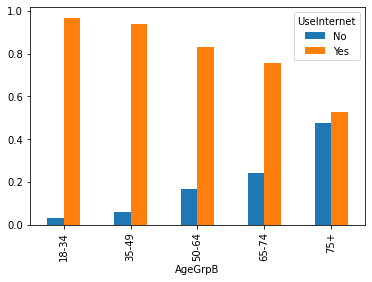

In [22]:
ageXnet = pd.crosstab(index=df3.AgeGrpB, columns=df3.UseInternet, normalize = 'index') #data frame with proportions

#plot age X internet
ageXnet.plot.bar(stacked=False)
plt.show()

In [23]:
#Chi square test for age and internet usage
(chi2_contingency(pd.crosstab(index=df3.AgeGrpB, columns=df3.UseInternet)))

(646.025078319146,
 1.6904349957648914e-138,
 4,
 array([[ 132.1607245 ,  554.8392755 ],
        [ 185.6406101 ,  779.3593899 ],
        [ 318.57082936, 1337.42917064],
        [ 222.76873213,  935.23126787],
        [ 149.85910391,  629.14089609]]))

Age and internet usage are not independent. 

In [24]:
#Labels for deivce ownership
device_labels = {1: 'Tablet', 2:'Smartphone', 3:'Basic Cell Only', 4:'None', 5:'Multiple Devices'}

In [25]:
df3.replace({"HaveDevice_Cat": device_labels}, inplace=True)
print(df3['HaveDevice_Cat'].value_counts(normalize=True)) #unweighted use internet

Multiple Devices    0.511619
Smartphone          0.276592
Basic Cell Only     0.108445
Tablet              0.054411
None                0.048933
Name: HaveDevice_Cat, dtype: float64


In [26]:
#Device ownership use by age
print(pd.crosstab(index=df3.AgeGrpB, columns=df3.HaveDevice_Cat,)) #Counts
ageXdevice = pd.crosstab(index=df3.AgeGrpB, columns=df3.HaveDevice_Cat, normalize = 'index') #Proportion
ageXdevice

HaveDevice_Cat  Basic Cell Only  Multiple Devices  None  Smartphone  Tablet
AgeGrpB                                                                    
18-34                        10               407     3         254       9
35-49                        23               655     5         258      15
50-64                       135               889    58         461      83
65-74                       164               524    59         301      85
75+                         211               195   115         153      79


HaveDevice_Cat,Basic Cell Only,Multiple Devices,None,Smartphone,Tablet
AgeGrpB,,,,,
18-34,0.014641,0.595900,0.004392,0.371889,0.013177
35-49,0.024059,0.685146,0.005230,0.269874,0.015690
50-64,0.083026,0.546740,0.035670,0.283518,0.051046
65-74,0.144748,0.462489,0.052074,0.265666,0.075022
75+,0.280212,0.258964,0.152722,0.203187,0.104914


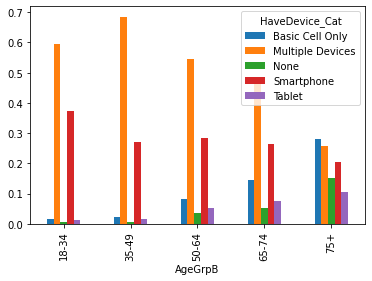

In [27]:
#plot age X device
ageXdevice.plot.bar(stacked=False)
plt.show()

In [28]:
#Health app usage
df3.replace({"TabletHealthWellnessApps": yes_no}, inplace=True)
print(df3['TabletHealthWellnessApps'].value_counts(normalize=True)) #unweighted use internet

Yes          0.523682
No           0.422252
Dont Know    0.054066
Name: TabletHealthWellnessApps, dtype: float64


In [29]:
#Health app use by age
print(pd.crosstab(index=df3.AgeGrpB, columns=df3.TabletHealthWellnessApps,)) #Counts
ageXapp = pd.crosstab(index=df3.AgeGrpB, columns=df3.TabletHealthWellnessApps, normalize = 'index')
ageXapp

TabletHealthWellnessApps  Dont Know   No  Yes
AgeGrpB                                      
18-34                            14  196  459
35-49                            22  325  585
50-64                            73  638  727
65-74                            57  460  398
75+                              62  225  137


TabletHealthWellnessApps,Dont Know,No,Yes
AgeGrpB,,,
18-34,0.020927,0.292975,0.686099
35-49,0.023605,0.348712,0.627682
50-64,0.050765,0.443672,0.505563
65-74,0.062295,0.502732,0.434973
75+,0.146226,0.530660,0.323113


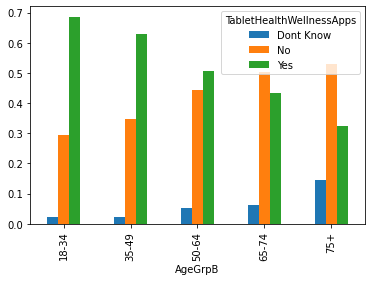

In [30]:
#plot age X tablet usage
ageXapp.plot.bar(stacked=False)
plt.show()